In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Question 1

$$ Y_{t+\delta t}-Y_t=(\frac{2Y_t}{1+t}+\frac{1+t^3}{3})\delta t+\frac{1+t^3}{3}N(0,\delta t)$$

$$ X_{t+\delta t}-X_t=(\frac{1}{5}-\frac{1}{2}X_t)\delta t+\frac{2N(0,\delta t)}{3}$$

In [2]:
# simulate Y
def sim_Y(Y0,m,T):
    # m: the number of small periods in T
    Y = Y0
    for i in range(0,m):
        Y = Y + (2*Y/(1+i*(T/m))+(1+(i*(T/m))**3)/3)*(T/m) +\
            (1+(i*(T/m))**3)/3 * np.sqrt(T/m) * np.random.normal(0,1,1)
    return Y[0]

# Y2
Y2 = []
for i in range(0,1000):
    Y2.append(sim_Y(3/4,1000,2))

# P(Y2>5)
Y2_5 = filter(lambda x:x>5, Y2)
p1 = len(list(Y2_5))/len(Y2)

In [3]:
# simulate X
def sim_X(X0,m,T):
    # m: the number of small periods in T
    X = X0
    for i in range(0,m):
        X = X + (1/5-0.5*X)*(T/m) +\
            (2/3) * np.sqrt(T/m) * np.random.normal(0,1,1)
    return X[0]

# X2^(1/3)
X2 = []
X2_3 = []
for i in range(0,1000):
    X2.append(sim_X(1,1000,2))
    if X2[i] >= 0:
        X2_3.append(X2[i]**(1/3))
    else:
        # python can't handle the root of negative numbers
        X2_3.append(-1*abs(X2[i])**(1/3))

e1 = np.mean(X2_3)

In [4]:
# Y3
Y3 = []
for i in range(0,1000):
    Y3.append(sim_Y(3/4,1000,3))
e2 = np.mean(Y3)

In [5]:
# X2*Y2
X2 = np.array(X2)
Y2 = np.array(Y2)
tran_X2 = np.where((X2)>1,1,0)
X2Y2 = X2 * Y2 * tran_X2
e3 = np.mean(X2Y2)

In [6]:
print('p1:',str(p1)+'\n',
      'e1:',str(e1)+'\n',
      'e2:',str(e2)+'\n',
      'e3:',str(e3)+'\n',sep="\n")

p1:
0.976

e1:
0.6699279547912925

e2:
26.04905525353944

e3:
3.8168777727833523



# Question 2

$$ X_{t+\delta t}-X_t=\frac{X_t\delta t}{4}+\frac{X_tN_1(0,\delta t)}{3}-\frac{3X_tN_2(0,\delta t)}{4}$$

In [7]:
# simulate X
def sim_X_2(X0,m,T):
    # m: the number of small periods in T
    X = X0
    for i in range(0,m):
        X = X + X*(T/m)/4 + (X/3)*np.random.normal(0,np.sqrt(T/m),1)\
            - (3/4)*X*np.random.normal(0,np.sqrt(T/m),1)
    return X[0]

# (1+X3)^(1/3)
X3 = []
X3_3 = []
for i in range(0,1000):
    X3.append(sim_X_2(1,1000,3))
    if 1+X3[i] >= 0:
        X3_3.append((1+X3[i])**(1/3))
    else:
        X3_3.append(-1*abs(1+X3[i])**(1/3))

e1 = np.mean(X3_3)

In [8]:
# simulate X1,Y1
X1 = []
for i in range(0,1000):
    X1.append(sim_X_2(1,1000,1))

Ny1 = np.random.normal(0,1,1000)
Ny2 = np.random.normal(0,1,1000)
Y1 = np.exp(-0.08 + (1/3)*Ny1 + (3/4)*Ny2)

X1 = np.array(X1)
e2 = np.mean(X1*Y1)

In [9]:
print('e1:',str(e1)+'\n',
      'e2:',str(e2)+'\n',sep="\n")

e1:
1.340889870083981

e2:
1.614101656703645



# Question 3

## (a) 

$$ S_{t+dt} - S_t = rS_tdt + \sigma S_t\sqrt{dt}Z(0,1)$$

In [10]:
# Monte Carlo simulation
def MT_call(S0,T,X,r,sigma,dt):
    
    # stock price at maturity
    def ST(S0,T,X,r,sigma,dt):
        wt = np.random.normal(0,np.sqrt(dt),round(T/dt))
        S = S0
        S_new = S0
        for i in range(0,round(T/dt)):
            S = S + r*S*dt + sigma*S*wt[i]
            S_new = S_new + r*S_new*dt + sigma*S_new*wt[i]*(-1)
        return S,S_new
    
    # simulate 10000 possible S(T)
    ST_mc = []
    ST_dv = [] # variance reduction terms
    for i in range(0,10000):
        ST_mc.append(ST(S0,T,X,r,sigma,dt)[0])
        ST_dv.append(ST(S0,T,X,r,sigma,dt)[1]) 

    # pay off
    payoff = []
    for i in range(0,10000):
        payoff.append((max(ST_dv[i]-X,0)+max(ST_mc[i]-X,0))/2)
        
    # discounting
    mt_p = np.mean(payoff) * np.exp(-1*r*T)
    return mt_p

mc_price = MT_call(20,0.5,20,0.04,0.25,0.004)
print('Monte Carlo simulation price (S0=20):', str(mc_price))

Monte Carlo simulation price (S0=20): 1.5844442656958069


## (b) 

In [11]:
# standard normal distribution CDF
def NX(x):
    d1 = 0.0498673470
    d2 = 0.0211410061
    d3 = 0.0032776263
    d4 = 0.0000380036
    d5 = 0.0000488906
    d6 = 0.0000053830
    if x > 0:
        N_x = 1 - 0.5*((1+d1*x+d2*(x**2)+d3*(x**3)+\
                        d4*(x**4)+d5*(x**5)+d6*(x**6))**(-16))
    else:
        N_x = 0.5*((1+d1*(-1*x)+d2*((-1*x)**2)+d3*((-1*x)**3)+\
                    d4*((-1*x)**4)+d5*((-1*x)**5)+d6*((-1*x)**6))**(-16))
    return N_x

In [12]:
# BS model
def BS_call(S0,X,T,r,sigma):
    D1 = (np.log(S0/X) + (r + (0.5*sigma**2))*T)/(sigma*np.sqrt(T))
    D2 = (np.log(S0/X) + (r - (0.5*sigma**2))*T)/(sigma * np.sqrt(T))
    bs_p = S0 * NX(D1) - X * np.exp(-r*T) * NX(D2)
    return bs_p

bs_price = BS_call(20,20,0.5,0.04,0.25)
print('Black-Scholes price (S0=20):', str(bs_price))

Black-Scholes price (S0=20): 1.6016002500234343


## (c)

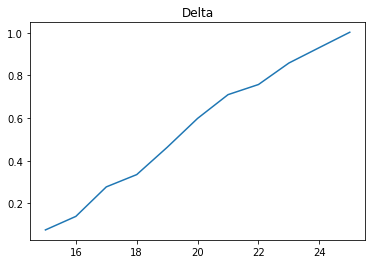

In [14]:
# Delta
def delta(S0,T,X,r,sigma,dt,e):
    sim_delta = (MT_call(S0+e,T,X,r,sigma,dt) -\
                 MT_call(S0-e,T,X,r,sigma,dt))/(2*e)
    return sim_delta

Delta = []
for i in range(15,26):
    Delta.append(delta(i,0.5,20,0.04,0.25,0.004,0.5))
    
plt.figure()
plt.plot(range(15,26),Delta)
plt.title('Delta')
plt.show()

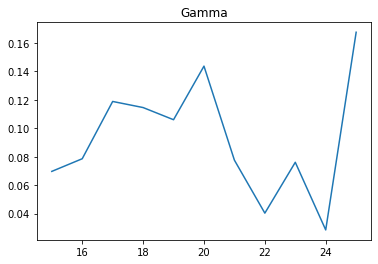

In [15]:
# Gamma
def gamma(S0,T,X,r,sigma,dt,e):
    sim_gamma = (delta(S0+e,T,X,r,sigma,dt,e) -\
                 delta(S0-e,T,X,r,sigma,dt,e))/(2*e)
    return sim_gamma

Gamma = []
for i in range(15,26):
    Gamma.append(gamma(i,0.5,20,0.04,0.25,0.004,0.5))
    
plt.figure()
plt.plot(range(15,26),Gamma)
plt.title('Gamma')
plt.show()

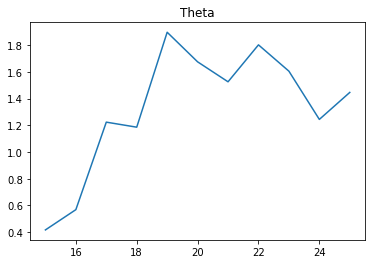

In [16]:
# Theta
def theta(S0,T,X,r,sigma,dt,e):
    sim_theta = (MT_call(S0,T+e,X,r,sigma,dt) -\
                 MT_call(S0,T-e,X,r,sigma,dt))/(2*e)
    return sim_theta

Theta = []
for i in range(15,26):
    Theta.append(theta(i,0.5,20,0.04,0.25,0.004,0.05))
    
plt.figure()
plt.plot(range(15,26),Theta)
plt.title('Theta')
plt.show()

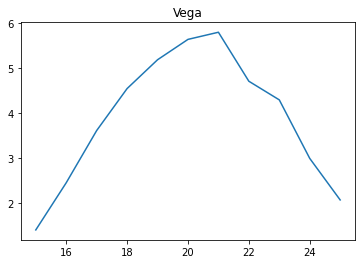

In [17]:
# Vega
def vega(S0,T,X,r,sigma,dt,e):
    sim_vega = (MT_call(S0,T,X,r,sigma+e,dt) -\
                MT_call(S0,T,X,r,sigma-e,dt))/(2*e)
    return sim_vega

Vega = []
for i in range(15,26):
    Vega.append(vega(i,0.5,20,0.04,0.25,0.004,0.05))
    
plt.figure()
plt.plot(range(15,26),Vega)
plt.title('Vega')
plt.show()

# Question 4

$$ S_{t+dt} = S_t + rS_tdt + \sqrt{V_t}S_t\sqrt{dt}Z_t^1(0,1) $$

$$ V_{t+dt} = V_t + \alpha(\beta - V_t)dt + \sigma\sqrt{V_t}\sqrt{dt}(\rho Z_t^1(0,1)+\sqrt{1-\rho^2}Z_t^2(0,1)$$

In [18]:
# Full Truncation
def ST_Full(S0,V0,r,dt,T,alpha,beta,sigma,rho):
    S = S0
    V = V0
    for i in range(0,round(T/dt)):
        z1 = np.random.normal(0,1,1)
        z2 = np.random.normal(0,1,1)
        S = S + r*S*dt + np.sqrt(max(0,V)*dt)*S*z1
        V = V + alpha*(beta-max(0,V))*dt +\
            sigma*np.sqrt(max(0,V)*dt)*(rho*z1+np.sqrt(1-rho**2)*z2)
    return S

In [19]:
# Partial Truncation
def ST_Part(S0,V0,r,dt,T,alpha,beta,sigma,rho):
    S = S0
    V = V0
    for i in range(0,round(T/dt)):
        z1 = np.random.normal(0,1,1)
        z2 = np.random.normal(0,1,1)
        S = S + r*S*dt + np.sqrt(max(0,V)*dt)*S*z1
        V = V + alpha*(beta-V)*dt +\
            sigma*np.sqrt(max(0,V)*dt)*(rho*z1+np.sqrt(1-rho**2)*z2)
    return S

In [20]:
# Reflection methods
def ST_Ref(S0,V0,r,dt,T,alpha,beta,sigma,rho):
    S = S0
    V = V0
    for i in range(0,round(T/dt)):
        z1 = np.random.normal(0,1,1)
        z2 = np.random.normal(0,1,1)
        S = S + r*S*dt + np.sqrt(abs(V)*dt)*S*z1
        V = abs(V) + alpha*(beta-abs(V))*dt +\
            sigma*np.sqrt(abs(V)*dt)*(rho*z1+np.sqrt(1-rho**2)*z2)
    return S

In [21]:
# simulate S(T), set dt = 0.04, T =1
full = []
pf1 = []
part = []
pf2 = []
ref = []
pf3 = []
K = 50 # strike price
for i in range(0,10000):
    full.append(ST_Full(48,0.05,0.03,0.04,0.5,5.8,0.0625,0.42,-0.6))
    pf1.append(max(full[i]-K,0))
    part.append(ST_Part(48,0.05,0.03,0.04,0.5,5.8,0.0625,0.42,-0.6))
    pf2.append(max(part[i]-K,0))
    ref.append(ST_Ref(48,0.05,0.03,0.04,0.5,5.8,0.0625,0.42,-0.6))
    pf3.append(max(ref[i]-K,0))

In [22]:
# calculate price
p_full = np.mean(pf1) * np.exp(-1*0.03*1)
p_part = np.mean(pf2) * np.exp(-1*0.03*1)
p_ref = np.mean(pf3) * np.exp(-1*0.03*1)

print('Monte Carlo simulation price (T=0.5,K=50)'+'\n',
      'Full Truncation:',str(p_full[0])+'\n',
      'Partial Truncation:',str(p_part[0])+'\n',
      'Reflection methods:',str(p_ref[0]),sep="\n")

Monte Carlo simulation price (T=0.5,K=50)

Full Truncation:
2.488901373692355

Partial Truncation:
2.4967237804983844

Reflection methods:
2.4473786244370634


# Question 5

## (a) 

In [23]:
# uniform distribution
def lgm_uniform(n,x0):
    
    m = (2**31)-1
    a = 7**5
    b = 0
    lgm0 = [] # original random numbers
    lgm0.append(x0) # set x_0 
    lgm = [] # random numbers in [0,1]
    lgm.append(1/m)
    for i in range(1,n):
        lgm0.append((a*lgm0[i-1]+b) % m)
        lgm.append(lgm0[i]/m)
        
    return lgm

u1 = lgm_uniform(100,0.5)
u2 = lgm_uniform(100,0.8)
u = pd.DataFrame({'u1':u1,'u2':u2})

## (b) 

In [24]:
def van_der_corput(n_sample, base=2):
    sequence = []
    for i in range(n_sample):
        n_th_number, denom = 0., 1.
        while i > 0:
            i, remainder = divmod(i, base)
            denom *= base
            n_th_number += remainder / denom
        sequence.append(n_th_number)
    return sequence

def halton(dim, n_sample, base):
    sample = [van_der_corput(n_sample + 1, dim) for dim in base]
    sample = np.stack(sample, axis=-1)[1:]
    return sample

In [25]:
hal_27 = pd.DataFrame(halton(2, 100, [2,7]))
hal_27.columns = '2','7'

## (c) 

In [26]:
hal_24 = pd.DataFrame(halton(2, 100, [2,4]))
hal_24.columns = '2','4'

## (d) 

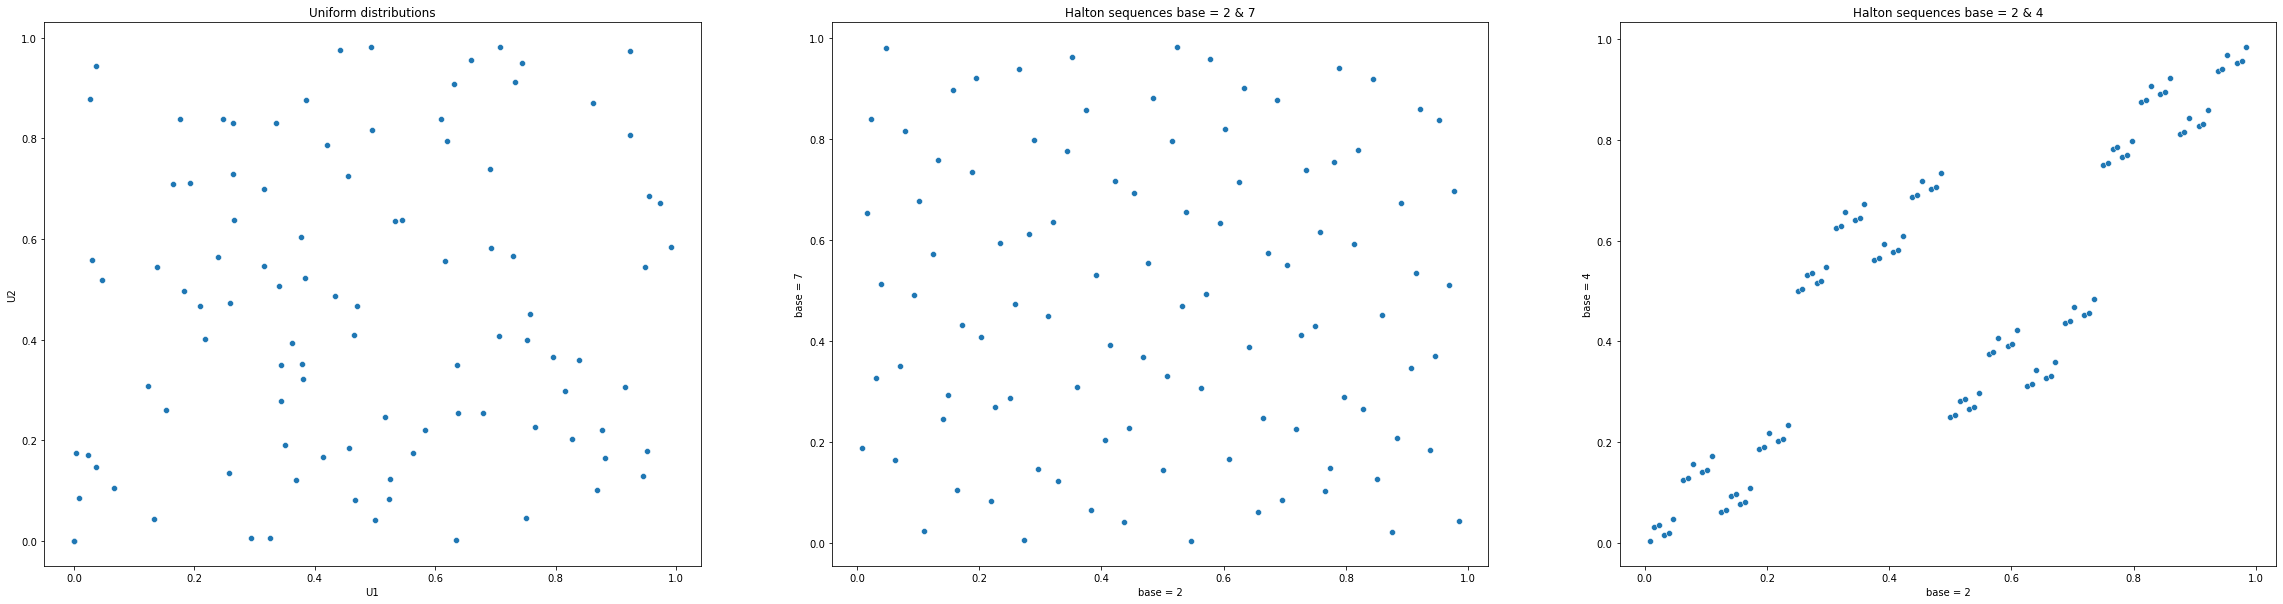

In [39]:
plt.figure(figsize=(40,10))
plt.figure(1)

fig1 = plt.subplot(1,3,1)
fig1 = sns.scatterplot(x=u['u1'], y=u['u2'])
fig1.set(xlabel="U1", ylabel="U2", 
         title = 'Uniform distributions')

fig2 = plt.subplot(1,3,2)
fig2 = sns.scatterplot(x=hal_27['2'], y=hal_27['7'])
fig2.set(xlabel="base = 2", ylabel="base = 7",
         title = 'Halton sequences base = 2 & 7')

fig3 = plt.subplot(1,3,3)
fig3 = sns.scatterplot(x=hal_24['2'], y=hal_24['4'])
fig3.set(xlabel="base = 2", ylabel="base = 4",
         title = 'Halton sequences base = 2 & 4')

plt.show()

According to the output, the Halton sequences based on 2&4 seems to cluster within some areas and are not randomly distributed in [-1,1]. While Halton sequences based on 2&7 and U1&U2 seem pretty uniform and Halton sequences are even better.

## (e) 

In [28]:
hal2457 = pd.DataFrame(halton(4, 10000, [2,4,5,7]))
hal2457.columns = '2','4','5','7'
hal2 = hal2457['2']
hal4 = hal2457['4']
hal5 = hal2457['5']
hal7 = hal2457['7']

In [29]:
# 2,4
I1 = []
for i in range(0,10000):
    if math.cos(2*math.pi*hal4[i]) >= 0:
        a = 1
    else:
        a = -1
    I1.append(np.exp(-1*hal2[i]*hal4[i]) *\
              (math.sin(6*math.pi*hal2[i])+\
               a*abs(math.cos(2*math.pi*hal4[i]))**(1/3)))

In [30]:
# 2,7
I2 = []
for i in range(0,10000):
    if math.cos(2*math.pi*hal7[i]) >= 0:
        a = 1
    else:
        a = -1
    I2.append(np.exp(-1*hal2[i]*hal7[i]) *\
              (math.sin(6*math.pi*hal2[i])+\
               a*abs(math.cos(2*math.pi*hal7[i]))**(1/3)))

In [31]:
# 5,7
I3 = []
for i in range(0,10000):
    if math.cos(2*math.pi*hal7[i]) >= 0:
        a = 1
    else:
        a = -1
    I3.append(np.exp(-1*hal5[i]*hal7[i]) *\
              (math.sin(6*math.pi*hal5[i])+\
               a*abs(math.cos(2*math.pi*hal7[i]))**(1/3)))

In [32]:
print('(2,4):',str(np.mean(I1))+'\n',
      '(2,7):',str(np.mean(I2))+'\n',
      '(5,7):',str(np.mean(I3)),sep="\n")

(2,4):
-0.004883898297003375

(2,7):
0.02611439677274074

(5,7):
0.02616365953051207
